Jason Smith  
Student ID: 293963  
jsmi268@wgu.edu  
WGU - MSDA  
D209- Data Mining I  
Data - Medical  
Program Mentor: Christiana Okhipo  

In [1]:
# Import libraries, set display parameters, import data set

In [2]:
# B3. List the packages or libraries you have chosen for Python and justify how each item on the list supports the analysis.

# Pandas -  supports ability to create dataframes and multi-dimensional arrays
import pandas as pd

# Numpy - Used to create error curves which helped to determine an ideal K-value. Used in section D2
import numpy as np

# Seaborn - data visualization
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Mute copy warnings
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

# Standard scaler - creates a common scale for data variables and reducing biased outcomes
from sklearn.preprocessing import StandardScaler

# KNN algorithm - classification algorithm
from sklearn.neighbors import KNeighborsClassifier

# Split data into train and test sets
from sklearn.model_selection import train_test_split

# Determine accuracy_score of KNN classifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Use conMaking the Confusion Matrix
from sklearn.metrics import confusion_matrix

# Change display max rows and columns
pd.options.display.max_rows = None
pd.set_option("display.max_columns", 1000)





In [3]:
# Import Clean Data Set 
df = pd.read_csv('med_data_clean.csv', index_col=False)


Part III: Data Preparation

In [4]:
# C3. Explain each of the steps used to prepare the data for the analysis. Identify the code segment for each step.

# Identify number of rows and columns in the data set
print("# of rows: ", df.shape[0])
print("# of columns: ", df.shape[1])

# of rows:  9999
# of columns:  52


In [33]:
# Describe data set
df.describe()

,Unnamed: 0,Zip,Latitude,Longitude,Population,VitD_levels,Doc_visits,Full_meals_eaten,VitD_supp,TotalCharge,Additional_charges,Admissions,Treatment,Visits,Reliability,Options,Hours,Courteous,Dr_comm,Children,Age,Income,Overweight,Anxiety,Initial_days
count,9999.000000,9999.000000,9999.000000,9999.000000,9999.00000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000
mean,5000.000000,50162.829383,38.750924,-91.244184,9962.09761,19.412574,5.012201,1.001500,0.398840,5891.257302,12934.657732,3.518752,3.506751,3.511151,3.515252,3.496950,3.522252,3.493949,3.509751,2.098660,53.296795,40479.829026,0.709214,0.322255,33.938594
std,2886.607005,27468.724995,5.403327,15.206357,14822.13967,6.723606,1.045787,1.008118,0.628507,3377.610179,6542.915985,1.032006,1.034864,1.032794,1.036223,1.030232,1.032130,1.021444,1.042352,1.855754,17.994487,24880.572722,0.431281,0.443767,24.852238
min,1.000000,610.000000,17.967190,-174.209690,0.00000,9.519012,1.000000,0.000000,0.000000,1256.751699,3125.702716,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,18.000000,154.080000,0.000000,0.000000,1.000000
25%,2500.500000,27600.500000,35.255120,-97.353525,694.50000,16.513078,4.000000,0.000000,0.000000,3252.917043,7986.270943,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,41.000000,23948.445000,0.000000,0.000000,8.000000
50%,5000.000000,50208.000000,39.419060,-88.399240,2765.00000,18.080368,5.000000,1.000000,0.000000,5851.488972,11573.903260,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000,2.058606,53.300937,40484.397511,1.000000,0.000000,34.000000
75%,7499.500000,72412.500000,42.044220,-80.439205,13938.00000,19.789360,6.000000,2.000000,1.000000,7614.327715,15626.601495,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,65.000000,46463.540000,1.000000,1.000000,59.000000
max,9999.000000,99929.000000,70.560990,-65.290170,122814.00000,53.019124,9.000000,7.000000,5.000000,21524.224210,30566.073130,8.000000,7.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000,10.000000,89.000000,207249.130000,1.000000,1.000000,71.000000


In [6]:
# Rename mis-spelled column
df.rename(columns={'Curteous':'Courteous'},  inplace=True, errors='raise')

In [7]:
# Reduce size of data set to include most relavent columns
df2 =df[['ReAdmis', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'VitD_supp',
       'Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke',
       'Complication_risk', 'Arthritis', 'Diabetes', 'Hyperlipidemia',
       'BackPain', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma',
       'Services', 'TotalCharge', 'Additional_charges', 'Admissions',
       'Treatment', 'Visits', 'Reliability', 'Options', 'Hours', 'Courteous',
       'Dr_comm', 'Children', 'Age', 'Income', 'Overweight', 'Anxiety',
       'Initial_days', 'Population']]
df2.head()

,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,VitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Arthritis,Diabetes,Hyperlipidemia,BackPain,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,TotalCharge,Additional_charges,Admissions,Treatment,Visits,Reliability,Options,Hours,Courteous,Dr_comm,Children,Age,Income,Overweight,Anxiety,Initial_days,Population
0,No,17.802330,6,0,0,No,Emergency Admission,Yes,No,Medium,Yes,Yes,No,Yes,Yes,No,Yes,Blood Work,3191.048774,17939.403420,3,3,2,2,4,3,3,4,3.000000,51.0,46805.99000,1.0,0.320908,15,2951
1,No,18.994640,4,2,1,No,Emergency Admission,Yes,No,High,No,No,No,No,No,Yes,No,Intravenous,4214.905346,17612.998120,3,4,3,4,4,4,3,3,3.000000,53.0,14370.14000,1.0,0.321309,4,11303
2,No,17.415889,4,1,0,No,Elective Admission,Yes,No,Medium,No,Yes,No,No,No,No,No,Blood Work,2177.586768,17505.192460,2,4,4,4,3,4,3,3,0.000000,78.0,39741.49000,0.0,0.322654,1,17125
3,No,17.420079,4,1,0,No,Elective Admission,No,Yes,Medium,Yes,No,No,No,No,Yes,Yes,Blood Work,2465.118965,12993.437350,3,5,5,3,4,5,5,5,2.035524,22.0,1209.56000,0.0,0.000000,1,2162
4,No,16.870524,5,0,2,Yes,Elective Admission,No,No,Low,No,No,Yes,No,Yes,No,No,CT Scan,1885.655137,3716.525786,2,1,3,3,5,3,4,3,2.079285,76.0,40484.44717,1.0,0.000000,5,5287


In [8]:
# Create subset of the data
df3 = df2[['Soft_drink', 'HighBlood', 'Stroke', 'Arthritis', 'Diabetes',
       'Hyperlipidemia', 'BackPain', 'Allergic_rhinitis', 'Reflux_esophagitis',
       'Asthma', 'Initial_admin', 'Complication_risk', 'Services', 'Courteous'
        , 'Initial_days', 'Doc_visits', 'Population', 'Treatment'
        , 'Hours', 'Admissions', 'VitD_levels','ReAdmis']]

df3.head()

,Soft_drink,HighBlood,Stroke,Arthritis,Diabetes,Hyperlipidemia,BackPain,Allergic_rhinitis,Reflux_esophagitis,Asthma,Initial_admin,Complication_risk,Services,Courteous,Initial_days,Doc_visits,Population,Treatment,Hours,Admissions,VitD_levels,ReAdmis
0,No,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,Emergency Admission,Medium,Blood Work,3,15,6,2951,3,3,3,17.802330,No
1,No,Yes,No,No,No,No,No,No,Yes,No,Emergency Admission,High,Intravenous,3,4,4,11303,4,4,3,18.994640,No
2,No,Yes,No,No,Yes,No,No,No,No,No,Elective Admission,Medium,Blood Work,3,1,4,17125,4,4,2,17.415889,No
3,No,No,Yes,Yes,No,No,No,No,Yes,Yes,Elective Admission,Medium,Blood Work,5,1,4,2162,5,5,3,17.420079,No
4,Yes,No,No,No,No,Yes,No,Yes,No,No,Elective Admission,Low,CT Scan,4,5,5,5287,1,3,2,16.870524,No


In [9]:
# Identify data types and whether Null values exist
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Soft_drink          9999 non-null   object 
 1   HighBlood           9999 non-null   object 
 2   Stroke              9999 non-null   object 
 3   Arthritis           9999 non-null   object 
 4   Diabetes            9999 non-null   object 
 5   Hyperlipidemia      9999 non-null   object 
 6   BackPain            9999 non-null   object 
 7   Allergic_rhinitis   9999 non-null   object 
 8   Reflux_esophagitis  9999 non-null   object 
 9   Asthma              9999 non-null   object 
 10  Initial_admin       9999 non-null   object 
 11  Complication_risk   9999 non-null   object 
 12  Services            9999 non-null   object 
 13  Courteous           9999 non-null   int64  
 14  Initial_days        9999 non-null   int64  
 15  Doc_visits          9999 non-null   int64  
 16  Popula

In [10]:

# Encode binary data values 
df3['ReAdmis'] = [1 if value=='Yes' else 0 for value in df2['ReAdmis']]
df3['Soft_drink'] =  [1 if value=='Yes' else 0 for value in df2['Soft_drink']]
df3['HighBlood'] =  [1 if value=='Yes' else 0 for value in df2['HighBlood']]
df3['Stroke'] =  [1 if value=='Yes' else 0 for value in df2['Stroke']]
df3['Arthritis'] =  [1 if value=='Yes' else 0 for value in df2['Arthritis']]
df3['Diabetes'] =  [1 if value=='Yes' else 0 for value in df2['Diabetes']]
df3['Hyperlipidemia'] =  [1 if value=='Yes' else 0 for value in df2['Hyperlipidemia']]
df3['BackPain'] =  [1 if value=='Yes' else 0 for value in df2['BackPain']]
df3['Allergic_rhinitis'] =  [1 if value=='Yes' else 0 for value in df2['Allergic_rhinitis']]
df3['Reflux_esophagitis'] =  [1 if value=='Yes' else 0 for value in df2['Reflux_esophagitis']]
df3['Asthma'] =  [1 if value=='Yes' else 0 for value in df2['Asthma']]

# Encode Categorical Data
# Instantiate LabelEncoder

le = LabelEncoder()

df3.Initial_admin = le.fit_transform(df2.Initial_admin)
    # 'Emergency Admission' = 1, 'Elective Admission' = 0, 'Observation Admission' = 3
df3.Complication_risk = le.fit_transform(df2.Complication_risk)    
    # 'Medium' = 2, 'High'= 0, "low" = 1 
    
df3.Services = le.fit_transform(df2.Services) 
    # 'Blood Work' = 0, 'Intravenous'= 2, 'CT Scan' = 1, 'MRI' = 3

df3.head()


,Soft_drink,HighBlood,Stroke,Arthritis,Diabetes,Hyperlipidemia,BackPain,Allergic_rhinitis,Reflux_esophagitis,Asthma,Initial_admin,Complication_risk,Services,Courteous,Initial_days,Doc_visits,Population,Treatment,Hours,Admissions,VitD_levels,ReAdmis
0,0,1,0,1,1,0,1,1,0,1,1,2,0,3,15,6,2951,3,3,3,17.802330,0
1,0,1,0,0,0,0,0,0,1,0,1,0,2,3,4,4,11303,4,4,3,18.994640,0
2,0,1,0,0,1,0,0,0,0,0,0,2,0,3,1,4,17125,4,4,2,17.415889,0
3,0,0,1,1,0,0,0,0,1,1,0,2,0,5,1,4,2162,5,5,3,17.420079,0
4,1,0,0,0,0,1,0,1,0,0,0,1,1,4,5,5,5287,1,3,2,16.870524,0


In [11]:
# Cross tabulation of discrete target and features
contvars = ['VitD_levels', 'Initial_days']
for a in df3.columns:
    if a not in contvars:
        print(pd.crosstab(df.ReAdmis, df[a]), '\n', '--------------------------------')
#table = pd.crosstab(df.ReAdmis, df.Services)
#table

Soft_drink    No   Yes
ReAdmis               
No          5109  1222
Yes         2946   722 
 --------------------------------
HighBlood    No   Yes
ReAdmis              
No         3747  2584
Yes        2162  1506 
 --------------------------------
Stroke     No   Yes
ReAdmis            
No       5071  1260
Yes      2935   733 
 --------------------------------
Arthritis    No   Yes
ReAdmis              
No         4086  2245
Yes        2340  1328 
 --------------------------------
Diabetes    No   Yes
ReAdmis             
No        4591  1740
Yes       2670   998 
 --------------------------------
Hyperlipidemia    No   Yes
ReAdmis                   
No              4206  2125
Yes             2422  1246 
 --------------------------------
BackPain    No   Yes
ReAdmis             
No        3758  2573
Yes       2127  1541 
 --------------------------------
Allergic_rhinitis    No   Yes
ReAdmis                      
No                 3825  2506
Yes                2234  1434 
 ---------

In [12]:
# Create data frame containing discrete variables
disc_df = df2[['ReAdmis', 'Doc_visits', 'Full_meals_eaten', 'VitD_supp',
       'Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke',
       'Complication_risk', 'Arthritis', 'Diabetes', 'Hyperlipidemia',
       'BackPain', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma',
       'Services','Admissions',
       'Treatment', 'Visits', 'Reliability', 'Options', 'Hours', 'Courteous',
       'Dr_comm','Overweight', 'Initial_days']]
disc_df.head()

,ReAdmis,Doc_visits,Full_meals_eaten,VitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Arthritis,Diabetes,Hyperlipidemia,BackPain,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Admissions,Treatment,Visits,Reliability,Options,Hours,Courteous,Dr_comm,Overweight,Initial_days
0,No,6,0,0,No,Emergency Admission,Yes,No,Medium,Yes,Yes,No,Yes,Yes,No,Yes,Blood Work,3,3,2,2,4,3,3,4,1.0,15
1,No,4,2,1,No,Emergency Admission,Yes,No,High,No,No,No,No,No,Yes,No,Intravenous,3,4,3,4,4,4,3,3,1.0,4
2,No,4,1,0,No,Elective Admission,Yes,No,Medium,No,Yes,No,No,No,No,No,Blood Work,2,4,4,4,3,4,3,3,0.0,1
3,No,4,1,0,No,Elective Admission,No,Yes,Medium,Yes,No,No,No,No,Yes,Yes,Blood Work,3,5,5,3,4,5,5,5,0.0,1
4,No,5,0,2,Yes,Elective Admission,No,No,Low,No,No,Yes,No,Yes,No,No,CT Scan,2,1,3,3,5,3,4,3,1.0,5


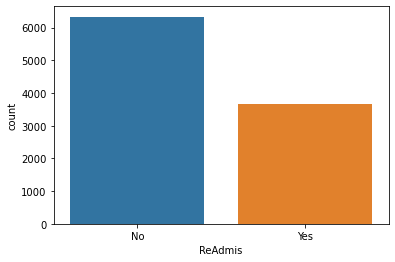

AxesSubplot(0.125,0.125;0.775x0.755) None 
 --------------------------------


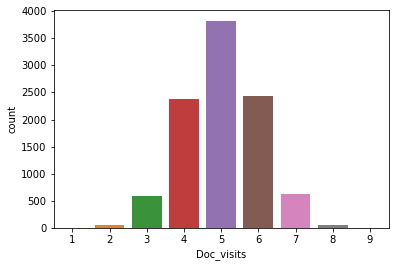

AxesSubplot(0.125,0.125;0.775x0.755) None 
 --------------------------------


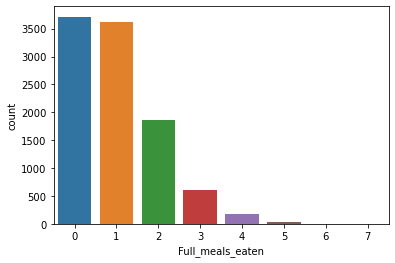

AxesSubplot(0.125,0.125;0.775x0.755) None 
 --------------------------------


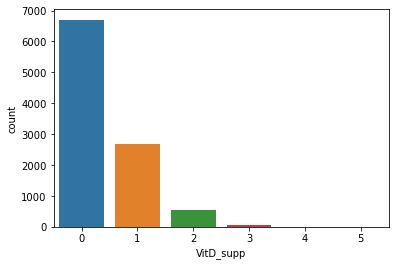

AxesSubplot(0.125,0.125;0.775x0.755) None 
 --------------------------------


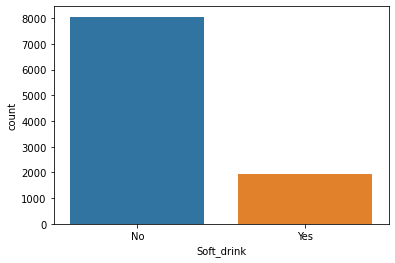

AxesSubplot(0.125,0.125;0.775x0.755) None 
 --------------------------------


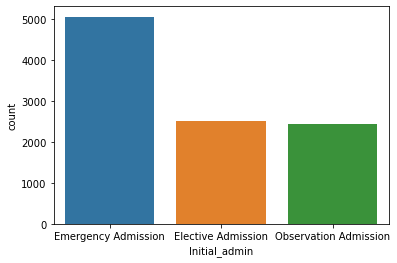

AxesSubplot(0.125,0.125;0.775x0.755) None 
 --------------------------------


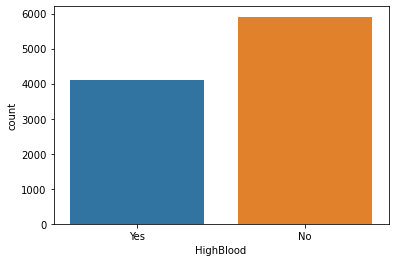

AxesSubplot(0.125,0.125;0.775x0.755) None 
 --------------------------------


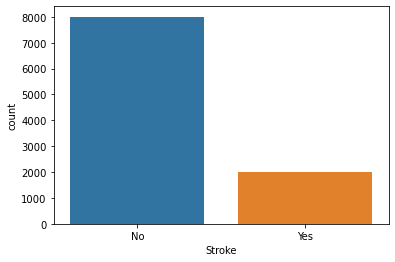

AxesSubplot(0.125,0.125;0.775x0.755) None 
 --------------------------------


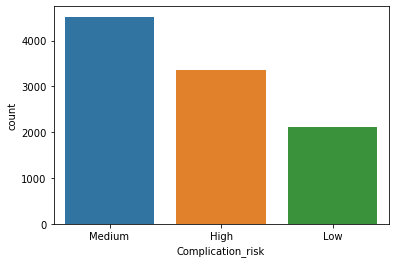

AxesSubplot(0.125,0.125;0.775x0.755) None 
 --------------------------------


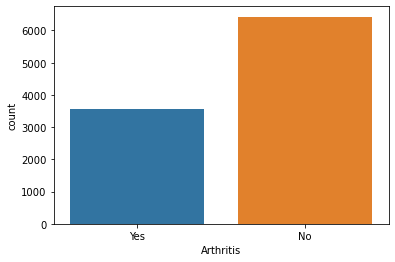

AxesSubplot(0.125,0.125;0.775x0.755) None 
 --------------------------------


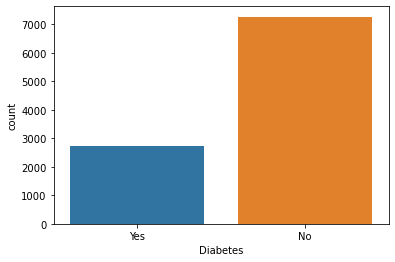

AxesSubplot(0.125,0.125;0.775x0.755) None 
 --------------------------------


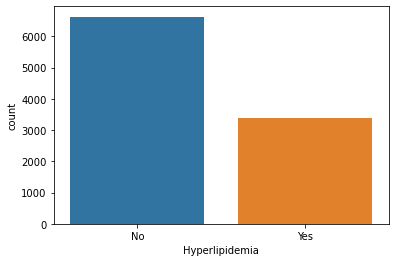

AxesSubplot(0.125,0.125;0.775x0.755) None 
 --------------------------------


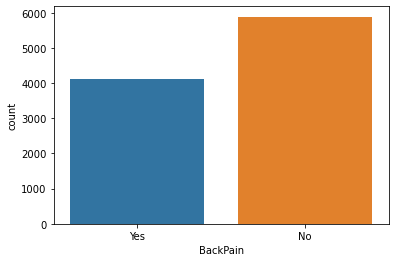

AxesSubplot(0.125,0.125;0.775x0.755) None 
 --------------------------------


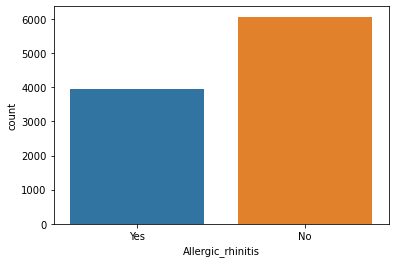

AxesSubplot(0.125,0.125;0.775x0.755) None 
 --------------------------------


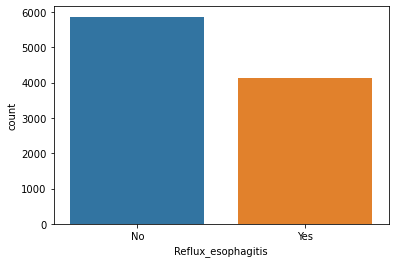

AxesSubplot(0.125,0.125;0.775x0.755) None 
 --------------------------------


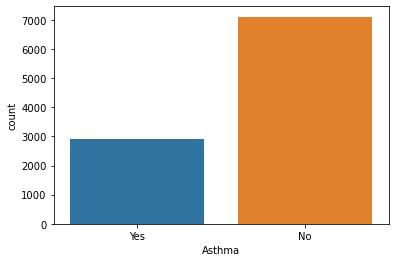

AxesSubplot(0.125,0.125;0.775x0.755) None 
 --------------------------------


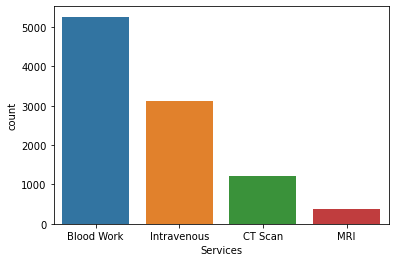

AxesSubplot(0.125,0.125;0.775x0.755) None 
 --------------------------------


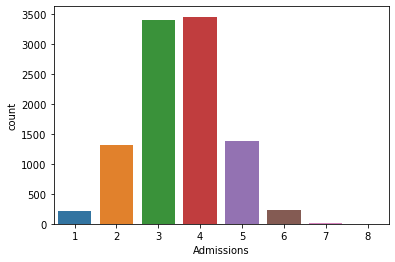

AxesSubplot(0.125,0.125;0.775x0.755) None 
 --------------------------------


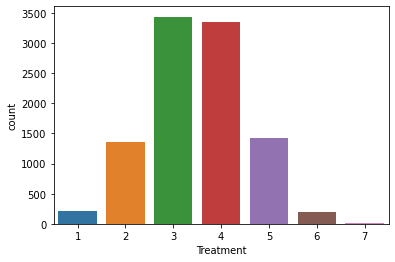

AxesSubplot(0.125,0.125;0.775x0.755) None 
 --------------------------------


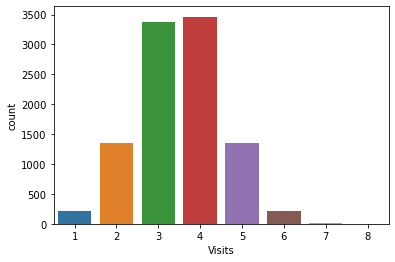

AxesSubplot(0.125,0.125;0.775x0.755) None 
 --------------------------------


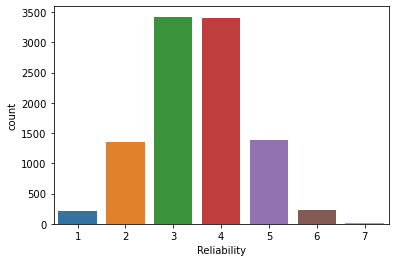

AxesSubplot(0.125,0.125;0.775x0.755) None 
 --------------------------------


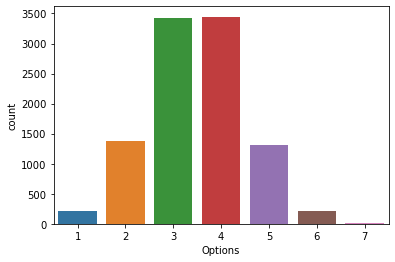

AxesSubplot(0.125,0.125;0.775x0.755) None 
 --------------------------------


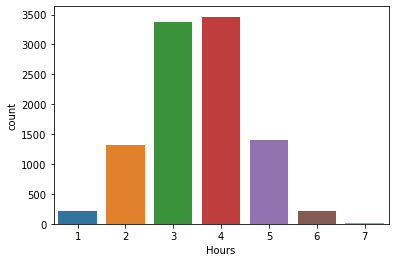

AxesSubplot(0.125,0.125;0.775x0.755) None 
 --------------------------------


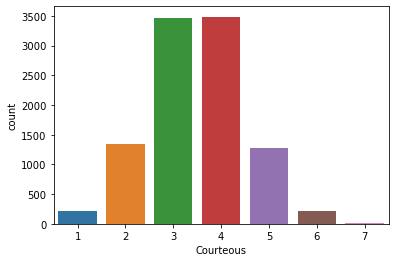

AxesSubplot(0.125,0.125;0.775x0.755) None 
 --------------------------------


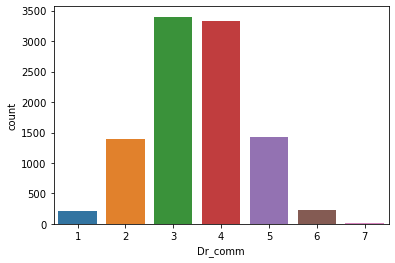

AxesSubplot(0.125,0.125;0.775x0.755) None 
 --------------------------------


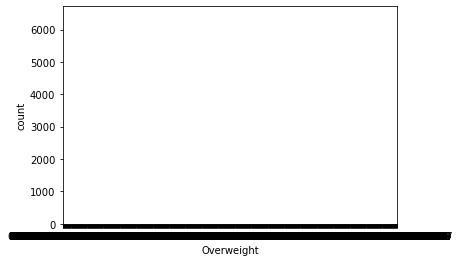

AxesSubplot(0.125,0.125;0.775x0.755) None 
 --------------------------------


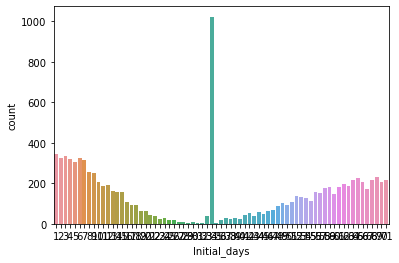

AxesSubplot(0.125,0.125;0.775x0.755) None 
 --------------------------------


In [13]:
# Countplot of discrete target and features

for a in disc_df.columns:
    print(sns.countplot(data = df2
            ,x = df2[a]
            ),
              plt.show(),'\n', '--------------------------------')

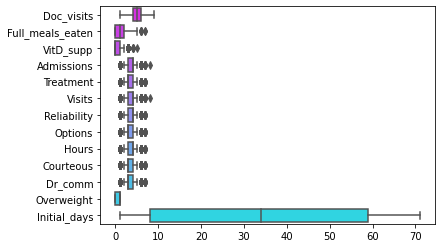

In [14]:
#Boxplot of discrete target and features         

# Box plot
ax = sns.boxplot(data=disc_df,orient="h",  palette="cool_r")

#*** convert to numbers

In [15]:
# Correlation table of  target and features
corrmat = df3.corr()
corrmat

,Soft_drink,HighBlood,Stroke,Arthritis,Diabetes,Hyperlipidemia,BackPain,Allergic_rhinitis,Reflux_esophagitis,Asthma,Initial_admin,Complication_risk,Services,Courteous,Initial_days,Doc_visits,Population,Treatment,Hours,Admissions,VitD_levels,ReAdmis
Soft_drink,1.000000,-0.006772,-0.004730,-0.020915,0.015120,0.014761,0.023704,-0.004661,0.002605,0.005876,-0.002008,-0.000957,0.007465,0.013302,-0.007470,0.017950,0.004221,0.008517,0.016832,-0.001825,-0.000833,0.004651
HighBlood,-0.006772,1.000000,0.007527,0.007427,-0.005909,-0.009414,0.002979,0.011814,0.001080,0.006121,0.006433,0.003450,-0.003089,0.007318,-0.004550,0.008967,0.009944,-0.007786,-0.002170,-0.010978,0.005053,0.002380
Stroke,-0.004730,0.007527,1.000000,-0.018373,0.005761,-0.014779,0.003560,-0.004775,-0.000096,0.002411,-0.000088,0.000281,-0.016280,-0.005255,-0.000137,-0.002230,-0.001584,-0.007730,0.004403,0.001972,-0.009690,0.000984
Arthritis,-0.020915,0.007427,-0.018373,1.000000,0.009180,-0.007319,-0.018694,0.008583,0.015009,-0.006339,-0.000399,0.021074,-0.003179,-0.008353,0.015632,-0.000717,-0.000230,-0.012427,-0.018402,-0.008595,-0.000486,0.007488
Diabetes,0.015120,-0.005909,0.005761,0.009180,1.000000,0.011827,-0.013457,0.005563,-0.007868,0.016726,-0.005140,0.001691,0.017338,-0.004706,-0.004033,0.012781,-0.009847,0.005964,-0.004113,0.013835,-0.023102,-0.002978
Hyperlipidemia,0.014761,-0.009414,-0.014779,-0.007319,0.011827,1.000000,-0.000846,-0.009225,0.001698,-0.009017,0.002186,0.009681,-0.004672,0.016134,-0.013995,-0.026731,-0.006522,0.000765,0.017319,0.019330,0.000316,0.004123
BackPain,0.023704,0.002979,0.003560,-0.018694,-0.013457,-0.000846,1.000000,0.004127,0.015967,0.014208,0.012548,-0.002047,-0.007353,-0.015741,0.018856,0.008513,0.006616,-0.005454,-0.015861,-0.011648,-0.002589,0.013424
Allergic_rhinitis,-0.004661,0.011814,-0.004775,0.008583,0.005563,-0.009225,0.004127,1.000000,-0.007627,0.004533,-0.026738,-0.013885,-0.000953,0.008384,0.005056,0.002922,0.007419,0.014716,-0.013024,0.009345,-0.002486,-0.004814
Reflux_esophagitis,0.002605,0.001080,-0.000096,0.015009,-0.007868,0.001698,0.015967,-0.007627,1.000000,-0.001512,-0.010537,-0.006069,-0.013754,-0.013616,0.010713,-0.005331,0.014523,0.017385,0.009934,0.011406,-0.007382,0.005533
Asthma,0.005876,0.006121,0.002411,-0.006339,0.016726,-0.009017,0.014208,0.004533,-0.001512,1.000000,-0.001894,0.009442,-0.008825,-0.013171,-0.014895,-0.017990,-0.001374,-0.007679,-0.009590,-0.011274,0.011335,-0.017051


Text(0.5, 1.0, 'Heatmap of discrete target and features')

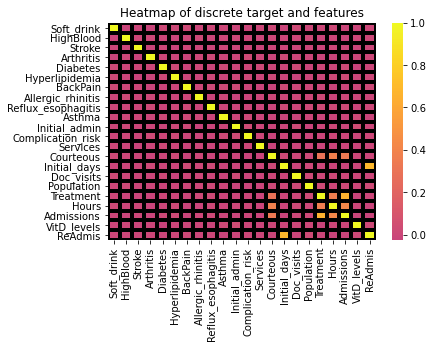

In [16]:
# Heatmap of discrete target and features
heatmap = sns.heatmap(data=corrmat, cmap="plasma", center = 0 ,
linewidths = 3, linecolor = "Black",
xticklabels = True, yticklabels = True)
plt.xticks(rotation=90)
plt.title('Heatmap of discrete target and features')

In [17]:
#C2 - Variables to be used with Datatypes
dataset =df3[['Initial_days', 'Population','Treatment','Doc_visits', 'VitD_levels', 'ReAdmis']]
dataset.head()

,Initial_days,Population,Treatment,Doc_visits,VitD_levels,ReAdmis
0,15,2951,3,6,17.802330,0
1,4,11303,4,4,18.994640,0
2,1,17125,4,4,17.415889,0
3,1,2162,5,4,17.420079,0
4,5,5287,1,5,16.870524,0


In [18]:
# Check for null values
df3.isna().sum()

Soft_drink            0
HighBlood             0
Stroke                0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Initial_admin         0
Complication_risk     0
Services              0
Courteous             0
Initial_days          0
Doc_visits            0
Population            0
Treatment             0
Hours                 0
Admissions            0
VitD_levels           0
ReAdmis               0
dtype: int64

In [19]:
# C4. Export clean data set
df3.to_csv("C:\\Users\\smith\\OneDrive\\Jason\\wgu\\Assignments\\D209 Data Mining 1\\Code\\nvm2.csv")

In [20]:
# Part IV: Analysis


In [21]:
# ID data frame to be used in analysis
print("Dataset DF:")
print(dataset.head())
print("\n # of Rows, columns:", dataset.shape)

Dataset DF:
   Initial_days  Population  Treatment  Doc_visits  VitD_levels  ReAdmis
0            15        2951          3           6    17.802330        0
1             4       11303          4           4    18.994640        0
2             1       17125          4           4    17.415889        0
3             1        2162          5           4    17.420079        0
4             5        5287          1           5    16.870524        0

 # of Rows, columns: (9999, 6)


In [22]:
# split the data into inputs and outputs
X = dataset.iloc[:, [0,4]].values
y = dataset.iloc[:,5].values


In [23]:
# D1. Split the data into training and test data sets and provide the file(s).
# training and testing data
from sklearn.model_selection import train_test_split

# assign train 75% and test data size 25%
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size= 0.25, random_state=0)

# Create data frames
xtrain_df = pd.DataFrame(X_train)
xtest_df = pd.DataFrame(X_test)
ytrain_df = pd.DataFrame(y_train)
ytest_df = pd.DataFrame(y_test)

# # Save to CSV
xtrain_df.to_csv("C:\\Users\\smith\\OneDrive\\Jason\\wgu\\Assignments\\D209 Data Mining 1\\Code\\xtrain.csv")
xtest_df.to_csv("C:\\Users\\smith\\OneDrive\\Jason\\wgu\\Assignments\\D209 Data Mining 1\\Code\\xtest.csv")
ytrain_df.to_csv("C:\\Users\\smith\\OneDrive\\Jason\\wgu\\Assignments\\D209 Data Mining 1\\Code\\ytrain.csv")
ytest_df.to_csv("C:\\Users\\smith\\OneDrive\\Jason\\wgu\\Assignments\\D209 Data Mining 1\\Code\\ytest.csv")

In [24]:
# D2. Describe the analysis technique you used to appropriately analyze the data. Include screenshots of the intermediate calculations you performed.

In [25]:
# D3. Classification Analysis using KNN 

# Scaling the input data
sc = StandardScaler()

# Scaling training and testing data set
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [26]:
# applying standard scale method
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# Scaling training and testing data set
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [27]:
# Run KNN with an inital guess at the K value and an ideal K-value

# Initial K-value set to be 3
# classifer = KNeighborsClassifier(n_neighbors=5 )  # 0.81
classifer = KNeighborsClassifier(n_neighbors=15 )  # 0.0.84

# model training
classifer.fit(X_train,y_train)

# testing the model
y_pred= classifer.predict(X_test)

In [28]:
# Determing KNN accuracy based on the current K-value
print(accuracy_score(y_test,y_pred))

0.8364


In [29]:
# Determing KNN accuracy based on the current K-value
#from sklearn.metrics import classification_report
target_names = ['Readmitted', 'Not Readmitted']
print(classification_report(y_test, y_pred, target_names=target_names))

                precision    recall  f1-score   support

    Readmitted       0.93      0.81      0.86      1595
Not Readmitted       0.72      0.89      0.80       905

      accuracy                           0.84      2500
     macro avg       0.83      0.85      0.83      2500
  weighted avg       0.85      0.84      0.84      2500



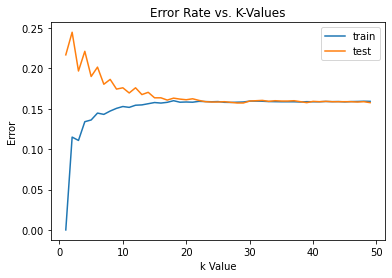

In [30]:
# Use error curves to choose an ideal K-value (Tarek Atwan, P.1)

# creating sets for errors
error1= []
error2= []

# for loop 
for k in range(1,50):
    # using KNN algorithm
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred1 = knn.predict(X_train)

    # stroring the errors
    error1.append(np.mean(y_train!= y_pred1))
    y_pred2 = knn.predict(X_test)
    error2.append(np.mean(y_test != y_pred2))

# ploting the graphs for testing and training 
plt.plot(range(1,50), error1, label="train")
plt.plot(range(1,50), error2, label="test")
plt.title('Error Rate vs. K-Values')
plt.xlabel('k Value')
plt.ylabel('Error')
plt.legend()


Text(0, 0.5, 'Error Rate')

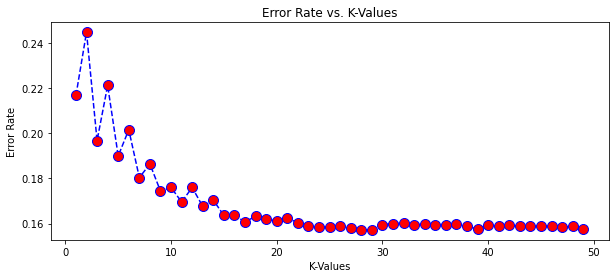

In [31]:
#Plotting error rate 
# import numpy
import numpy as np
error_rate = []

# searching k value upto  40
for i in range(1,50):
    # knn algorithm 
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)

    # testing the model
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

# Configure and plot error rate over k values
plt.figure(figsize=(10,4))
plt.plot(range(1,50), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K-Values')
plt.xlabel('K-Values')
plt.ylabel('Error Rate')

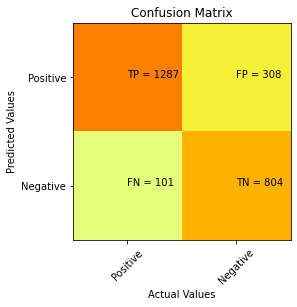

In [32]:
# Evaluating KNN algorithm performance
# Confusion Matrix

# # importing seaborn
# import seaborn as sns

# # Making the Confusion Matrix
# from sklearn.metrics import confusion_matrix

# providing actual and predicted values
cm = confusion_matrix(y_test, y_pred)

# If True, write the data value in each cell
sns.heatmap(cm,annot=True)
# formatting
plt.clf()
plt.imshow(cm,interpolation='nearest', cmap=plt.cm.Wistia)
plt.ylabel('Predicted Values')
plt.xlabel('Actual Values')
classNames = ['Positive', 'Negative']
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
plt.title('Confusion Matrix')
s = [['TP','FP' ], ['FN','TN']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
# saving confusion matrix in png form
plt.savefig('confusion_Matrix.png')
#print(cm)
plt.show()
 